In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import plotly.graph_objects as go
import nltk
from nltk.tokenize  import word_tokenize
import re
from nltk.corpus import stopwords
from collections import Counter


In [2]:
df1 = pd.read_csv('new_File1.csv')
df2 = pd.read_csv('new_File2.csv')

# Categorizing Difficulties

In [3]:
analysis = df2[['department', 'challenges_faced', 'how_skye8_cam_improve_intern_satisfaction']]
chalages = ['operational, technical, financial, or interpersonal issues']
imporvements = ['compensation, work environment, mentorship, or professional growth']
def categorize_challenges(challenge):
    if "workload"  in challenge.lower() or 'worked so much' in challenge.lower():
        return "High Workload"
    elif "communication" in challenge.lower():
        return "Poor Communication"
    elif "training" in challenge.lower():
        return "Training and Development"
    elif "software" in challenge.lower() or "tools" in challenge.lower():
        return "Technology"
    elif "time" in challenge.lower():
        return "Less Time Allocation"
    elif "unclear expectations" in challenge.lower() or "job roles" in challenge.lower():
        return "unclear expectations"
    elif "none" in challenge.lower() or "job roles" in challenge.lower():
            return "No Difficulties"  
    elif "none" in challenge.lower() or "starting" in challenge.lower():
            return "No Difficulties"   
    
    else:
        return "Other"


# Print categorized challenges

analysis["challenge_category"] = analysis["challenges_faced"].apply(categorize_challenges)
analysis



C:\Users\mufor\AppData\Local\Temp\ipykernel_16608\2549432027.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis["challenge_category"] = analysis["challenges_faced"].apply(categorize_challenges)


,department,challenges_faced,how_skye8_cam_improve_intern_satisfaction,challenge_category
0,Back-end,I'm still starting out the internship.,Creation of outdoor activities per time.,No Difficulties
1,Front-end,Unclear expectations,User did not input anything,unclear expectations
2,Front-end,Mostly the time for task completion was not th...,"actually, I think they are doing a great job, ...",Less Time Allocation
3,Back-end,poor communication amongst interns,Better communication overall,Poor Communication
4,Front-end,"high workload, unclear expectation",More structured training (possibly an outline ...,High Workload
5,Data science,Unclear expectations,Should make interaction with more people outsi...,unclear expectations
6,Front-end,The only challenge I face at skye8 is the subm...,I think skye8 can improve on task time schedul...,Less Time Allocation
7,Front-end,Faced alot with the JavaScript,More structured training,Other
8,Front-end,Poor communication,More structured training,Poor Communication
9,Front-end,High workload\r\nUnclear expectations\r\nMenta...,Make a course outline of what the interns are ...,High Workload


# category with most difficulties


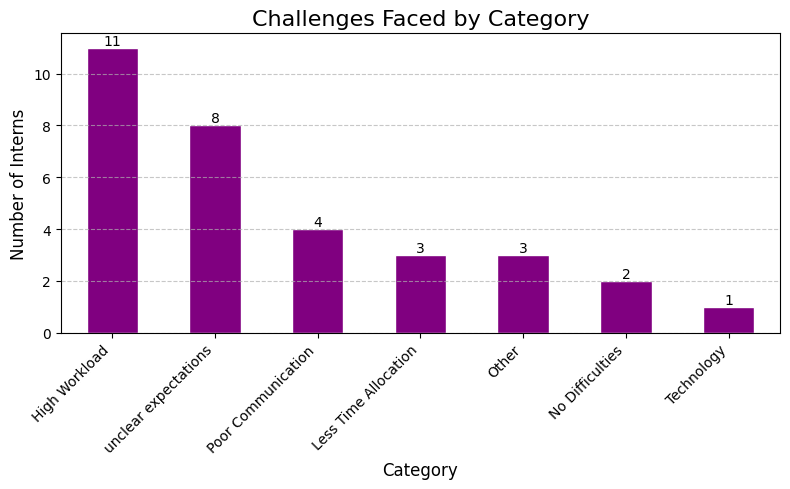

In [4]:
category_counts = analysis["challenge_category"].value_counts()
plt.figure(figsize=(8, 5))
bar = category_counts.plot(kind='bar', color='purple', edgecolor='white')
for bar in bar.patches:
    hieght = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, hieght, int(hieght), ha='center', va='bottom')
plt.title("Challenges Faced by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Interns", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



1. From the charts we can see more students had difficulties with respect to work load followed by unclear expectations which means the task assigned was not clearly explained on how to go about with

# Difficulties per stack

<Figure size 1000x600 with 0 Axes>

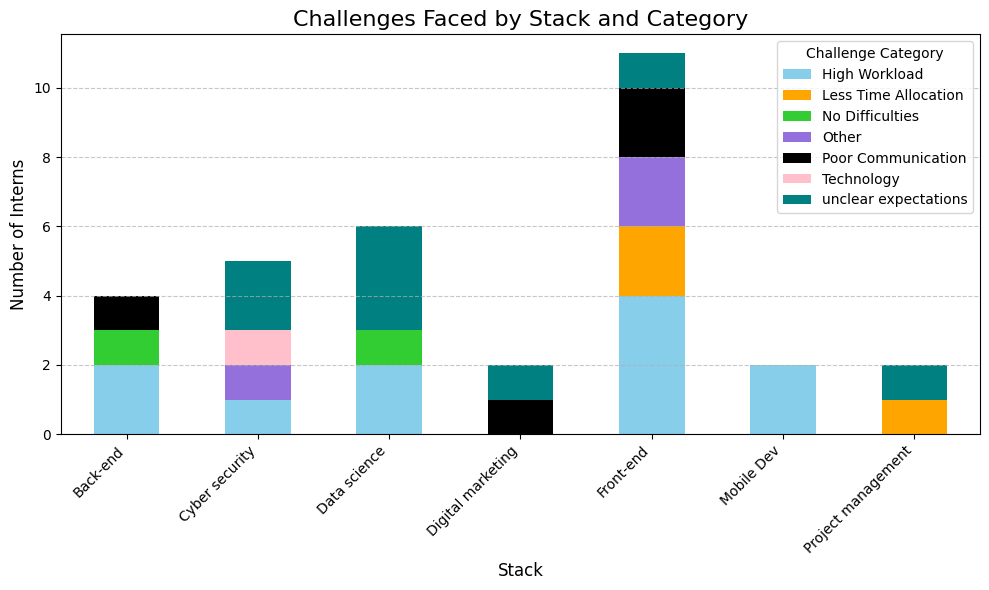

In [5]:
grouped_data = analysis.groupby(['department', 'challenge_category']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#87CEEB', '#FFA500', '#32CD32', '#9370DB', 'black', '#FFC0CB', '#008080'])

# Add labels and title
plt.title('Challenges Faced by Stack and Category', fontsize=16)
plt.xlabel('Stack', fontsize=12)
plt.ylabel('Number of Interns', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Challenge Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# Proprtion of difficulties per stack


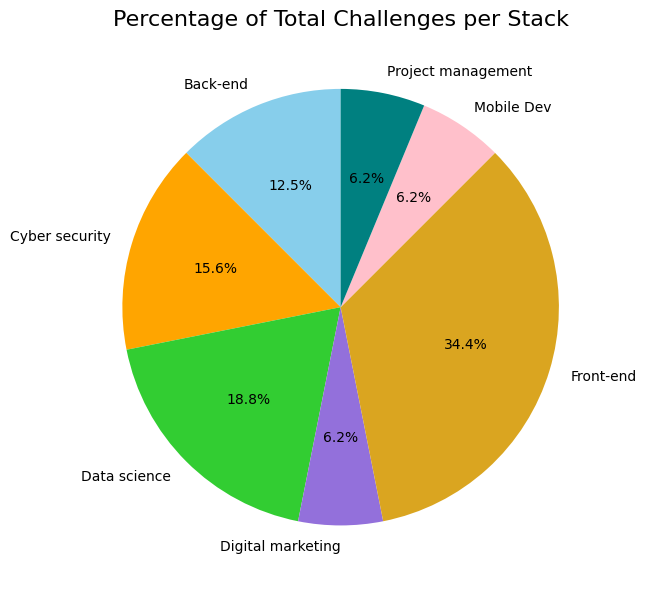

In [6]:
stack_totals = analysis.groupby('department').size()
stack_percentages = (stack_totals / stack_totals.sum()) * 100
plt.figure(figsize=(8, 6))
stack_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#87CEEB', '#FFA500', '#32CD32', '#9370DB', '#DAA520', '#FFC0CB', '#008080'])
plt.title('Percentage of Total Challenges per Stack', fontsize=16)
plt.ylabel('')  
plt.tight_layout()

# Show the plot
plt.show()


# What could Skye8 do to improve the intern experience?



### **Internship Program Enhancements**
1. **Structured Training**: Develop more comprehensive and well-defined training programs, including detailed course outlines and onboarding processes tailored to interns' varying skill levels (e.g., beginner vs advanced).
2. **Project Goals**: Set clear objectives for projects and tasks to help interns understand expectations.
3. **Orientation Sessions**: Include sessions to introduce interns to different specialties and clarify roles within the organization.
4. **Feedback Mechanism**: Schedule regular feedback and check-ins for interns to track their progress and address concerns promptly.
5. **Workload Balance**: Ensure a manageable workload while increasing meaningful responsibilities for interns.
6. **Expand Internship Opportunities**: Increase the organization's capacity to host more interns while maintaining quality experiences.

### **Social and Collaborative Improvements**
1. **Networking Opportunities**: Encourage interaction between interns and staff members outside the workspace through friendly initiatives or social events.
2. **Team Building**: Implement initiatives that foster stronger connections among interns.
3. **Exhibition and Competitions**: Organize inter-department challenges or exhibitions to showcase interns' work and improve overall productivity.

### **Infrastructure and Scheduling Improvements**
1. **Electricity Availability**: Standby generators should be available to prevent disruptions due to power outages.
2. **Temperature Regulation**: Address heat discomfort caused by laptops and overcrowding by improving the cooling or ventilation system.
3. **Time Management**: Optimize task schedules and consider adjusting the timing for Monday meetings to improve efficiency.
4. **Outdoor Activity Scheduling**: Create a plan to incorporate outdoor activities periodically, encouraging creative breaks and physical wellness.

These improvements aim to strengthen Skye8's internship program while providing an enhanced working environment.